In [1]:
# Analysis imports
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import hvplot.pandas
from datetime import datetime

# API imports
import requests
import json
from pprint import pprint
from api_keys import twelve_data_key

# Using the API tools from TwelveData

In [2]:
# Create the params for the API request
base_url = 'https://api.twelvedata.com/time_series'
ticker_symbol = 'GOOG,AAPL,NFLX,AMZN,META'
start_date = '2020-01-01'
interval = '1day'

# Creates the query url for the API request
query_url = f'{base_url}?symbol={ticker_symbol}&start_date={start_date}&interval={interval}&apikey={twelve_data_key}'

In [3]:
# Creates a json file from the API request
response = requests.get(query_url).json()

# Pretty prints the JSON of stock data
# pprint(response)

In [25]:
# Function for creating a custom dataframe of the data for each stock in the JSON request
def stock_dataframe_maker(stock):
    # Lists for the dataframe
    date_list = []
    open_list = []
    high_list = []
    low_list = []
    close_list = []
    volume_list = []
    year_list = []
    month_list = []

    # A for loop to collect the data from the JSON request and place it in each list
    for i in range(len(response[stock]['values'])):
        date_list.append(datetime.strptime(response[stock]['values'][-(1+i)]['datetime'], '%Y-%m-%d'))
        open_list.append(float(response[stock]['values'][-(1+i)]['open']))
        high_list.append(float(response[stock]['values'][-(1+i)]['high']))
        low_list.append(float(response[stock]['values'][-(1+i)]['low']))
        close_list.append(float(response[stock]['values'][-(1+i)]['close']))
        volume_list.append(float(response[stock]['values'][-(1+i)]['volume']))
        year_list.append(datetime.strptime(response[stock]['values'][-(1+i)]['datetime'], '%Y-%m-%d').year)
        month_list.append(datetime.strptime(response[stock]['values'][-(1+i)]['datetime'], '%Y-%m-%d').month)

    # Uses the lists from the loop and creates a dataframe from them
    df = pd.DataFrame({
        'Date':date_list,
        'Open': open_list,
        'High': high_list,
        'Low': low_list,
        'Close': close_list,
        'Volume': volume_list,
        'Year': year_list,
        'Month': month_list
    })

    # Returns the dataframe that was created
    return df

# Creates the desired dataframes for each stock in the JSON response
google_new_df = stock_dataframe_maker('GOOG')
apple_new_df = stock_dataframe_maker('AAPL')
amazon_new_df = stock_dataframe_maker('AMZN')
netflix_new_df = stock_dataframe_maker('NFLX')
facebook_new_df = stock_dataframe_maker('META')

# Display Dataframes
print(google_new_df.head())
print(apple_new_df.head())
print(amazon_new_df.head())
print(netflix_new_df.head())
print(facebook_new_df.head())


        Date   Open   High    Low  Close      Volume  Year  Month
0 2020-01-02  67.08  68.41  67.08  68.37  28134620.0  2020      1
1 2020-01-03  67.39  68.62  67.28  68.03  23740120.0  2020      1
2 2020-01-06  67.50  69.83  67.50  69.71  34662980.0  2020      1
3 2020-01-07  69.90  70.15  69.52  69.67  30233860.0  2020      1
4 2020-01-08  69.60  70.58  69.54  70.22  30583540.0  2020      1
        Date     Open    High      Low    Close       Volume  Year  Month
0 2020-01-02  74.0600  75.150  73.7975  75.0875  135480400.0  2020      1
1 2020-01-03  74.2875  75.145  74.1250  74.3575  146322800.0  2020      1
2 2020-01-06  73.4475  74.990  73.1875  74.9500  118387200.0  2020      1
3 2020-01-07  74.9600  75.225  74.3700  74.5975  108872000.0  2020      1
4 2020-01-08  74.2900  76.110  74.2900  75.7975  132079200.0  2020      1
        Date   Open   High    Low  Close      Volume  Year  Month
0 2020-01-02  93.75  94.90  93.21  94.90  80718200.0  2020      1
1 2020-01-03  93.22  94.31  

In [27]:
# Function to plot stocks by using a dataframe for the stock dataframe maker
def stock_plot(dataframe, stock_name):

    # Gets the data ready for plotting
    dataframe_by_month = dataframe.groupby(['Year', 'Month'])['Close'].mean()
    x_labels = []
    for x in range(len(dataframe)):
        x_labels.append(f'{dataframe.iloc[x,6]}, {dataframe.iloc[x,7]}')
    x_ticks = pd.Series(x_labels).unique()

    # Creates the plot
    fig, ax = plt.subplots(figsize=(25,10))
    ax.plot(x_ticks, dataframe_by_month)
    ax.set_ylim(0,700)

    # Creats the labels
    ax.set_xlabel('Months')
    ax.set_ylabel('Average Close Price (USD)')
    ax.set_title(f'Average {stock_name} Closing Price Per Month')
    ax.set_xticks(ticks=x_ticks, labels=x_ticks, rotation=45)

    # Shows the plot
    plt.show()

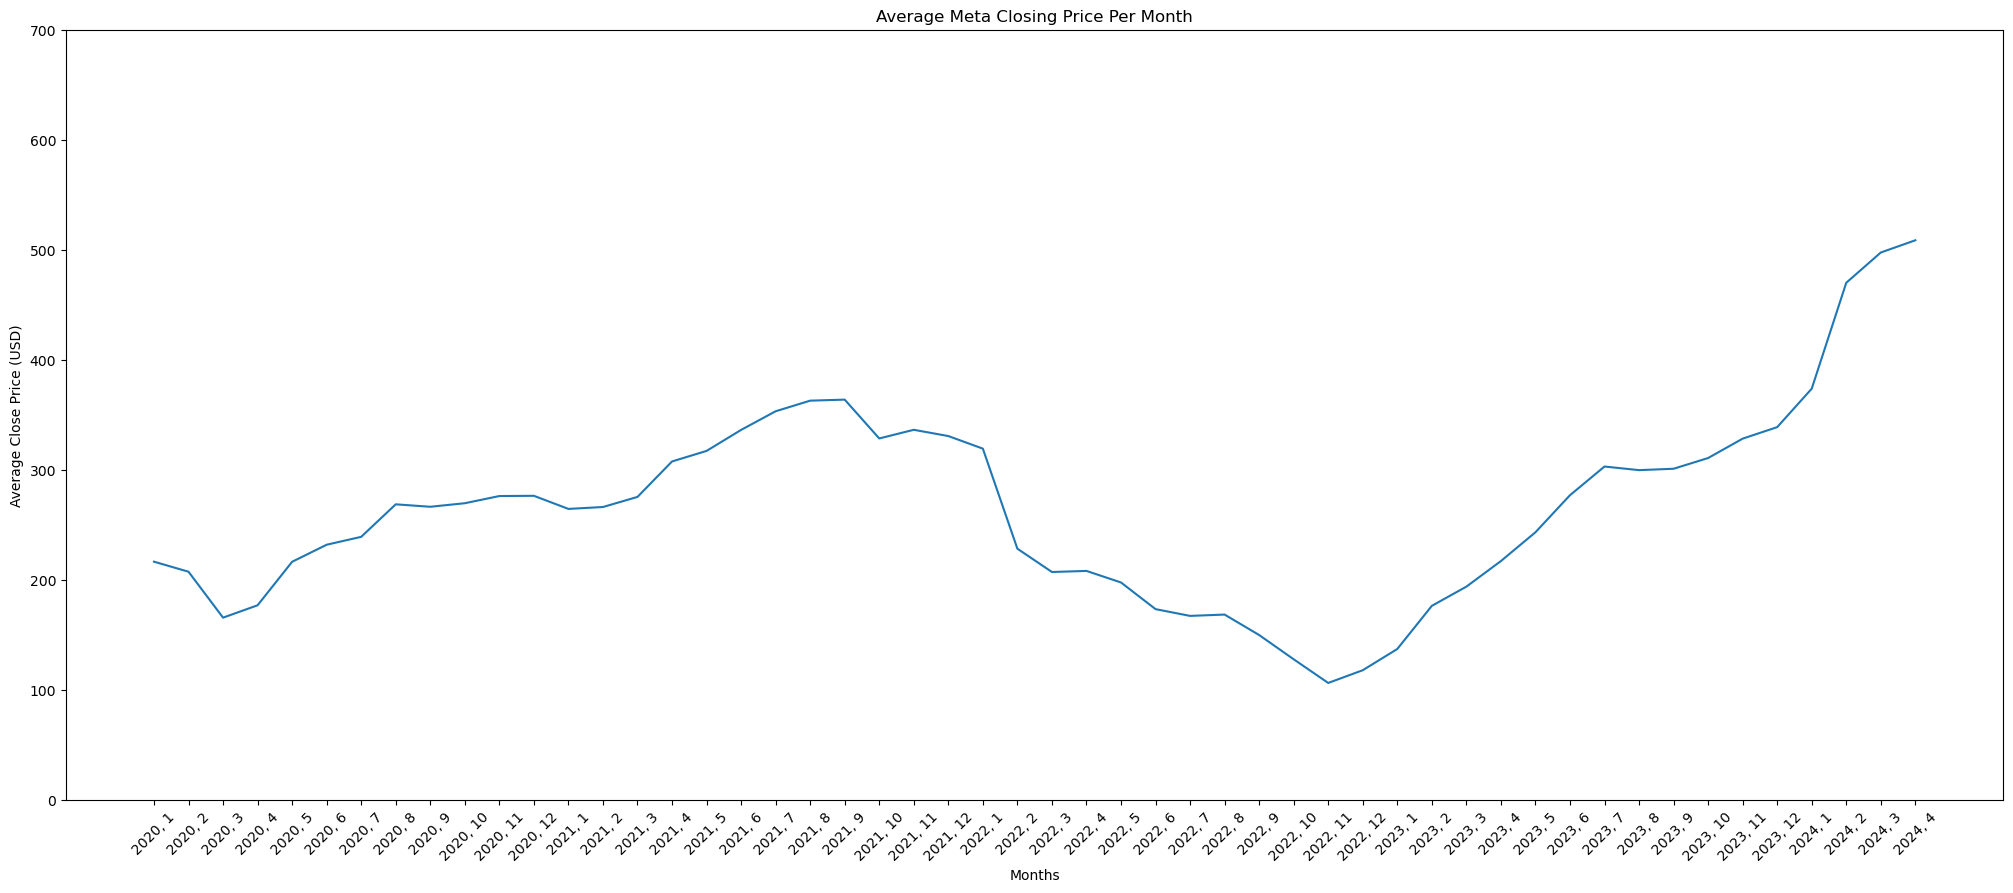

In [28]:
# Creates the plot for Meta
stock_plot(facebook_new_df, 'Meta')

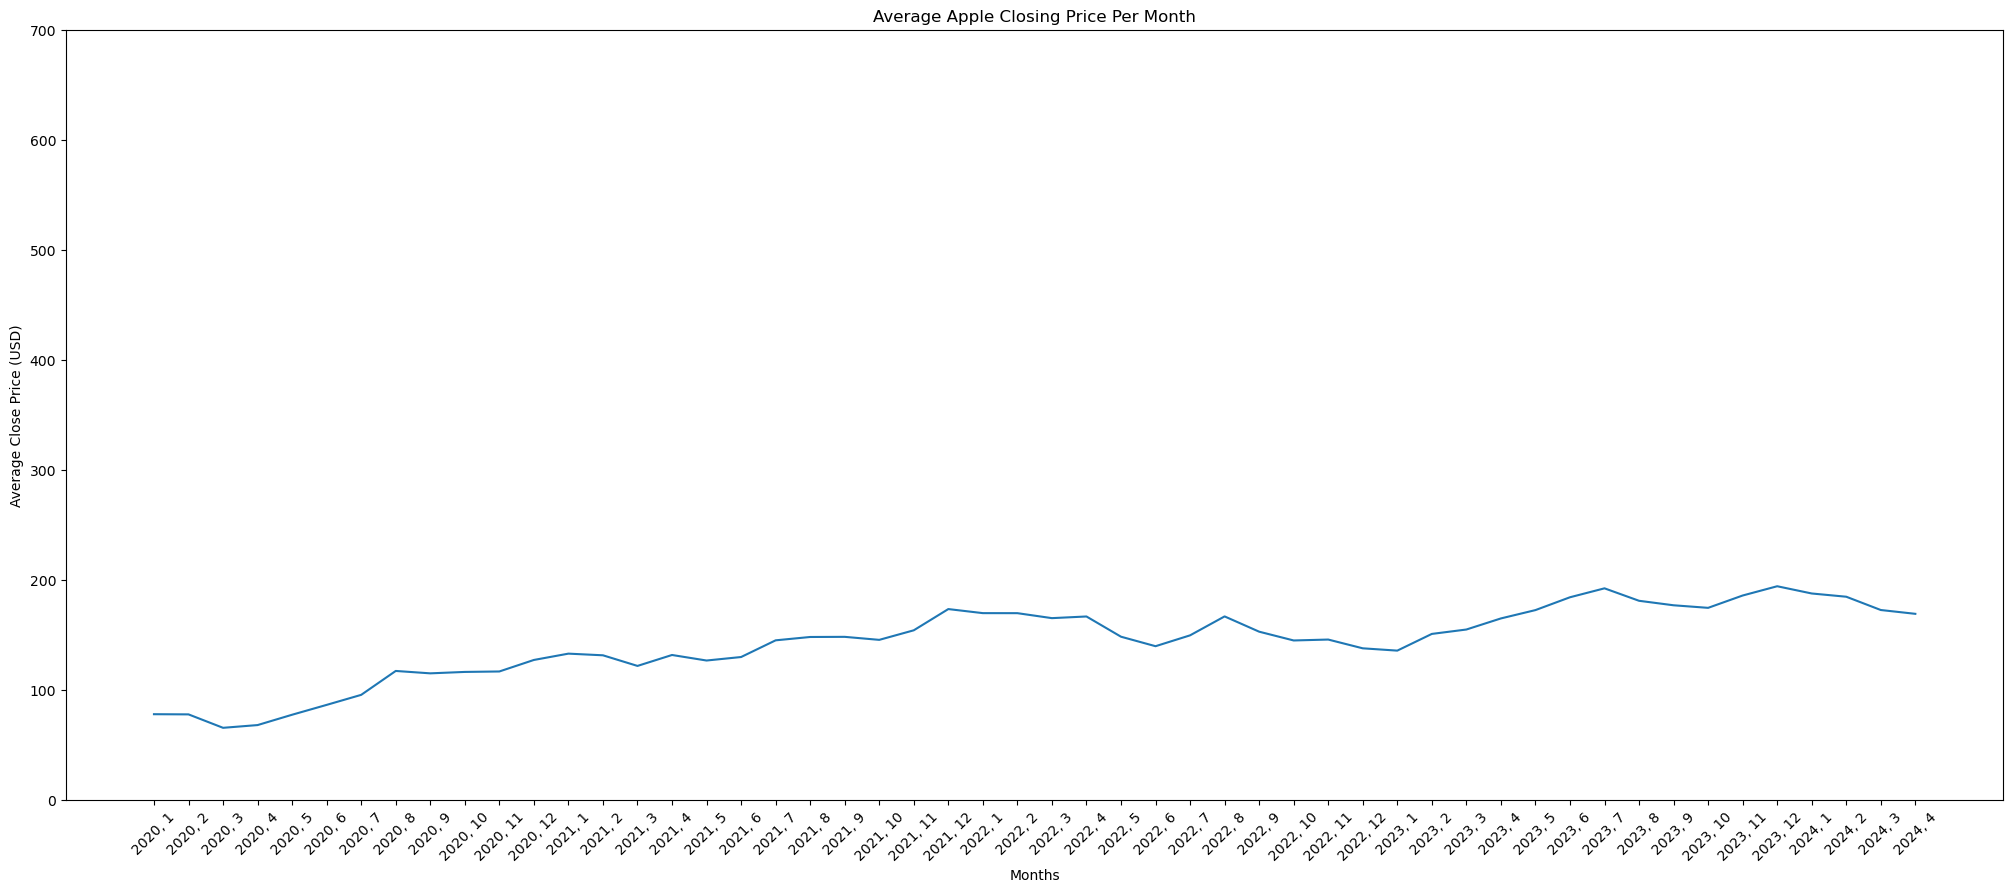

In [29]:
# Creates the plot for Apple
stock_plot(apple_new_df, 'Apple')

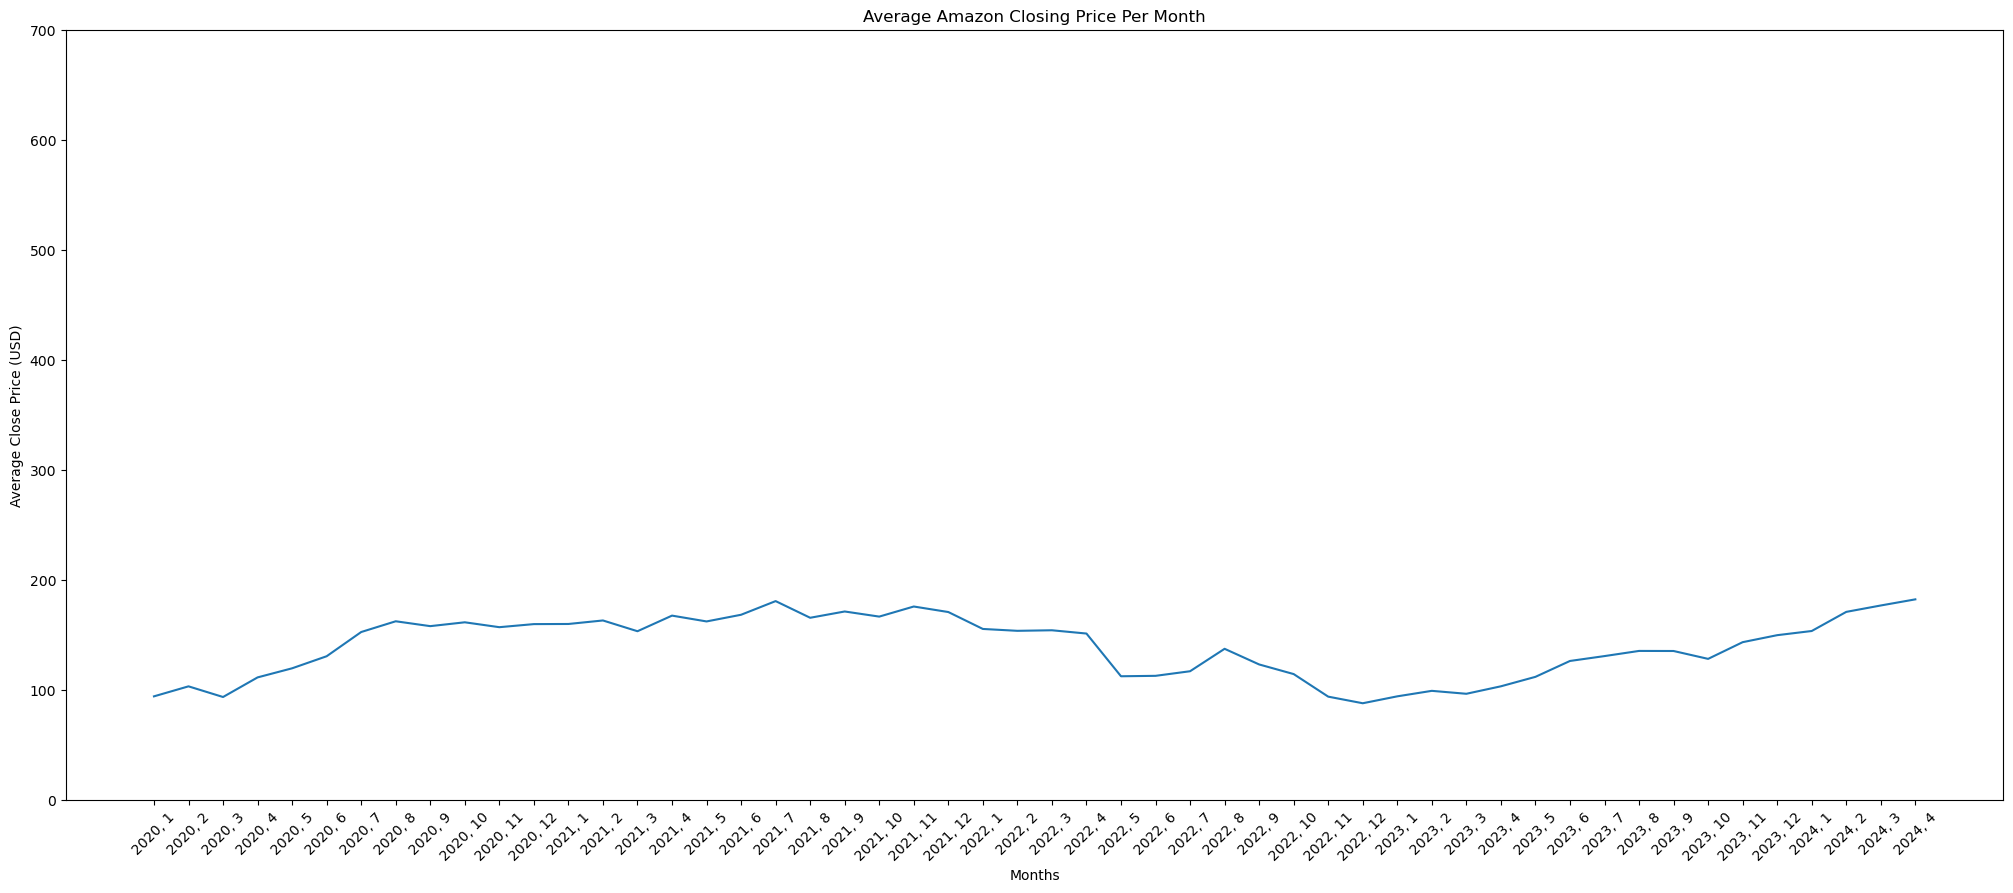

In [30]:
# Creates the plot for Amazon
stock_plot(amazon_new_df, 'Amazon')

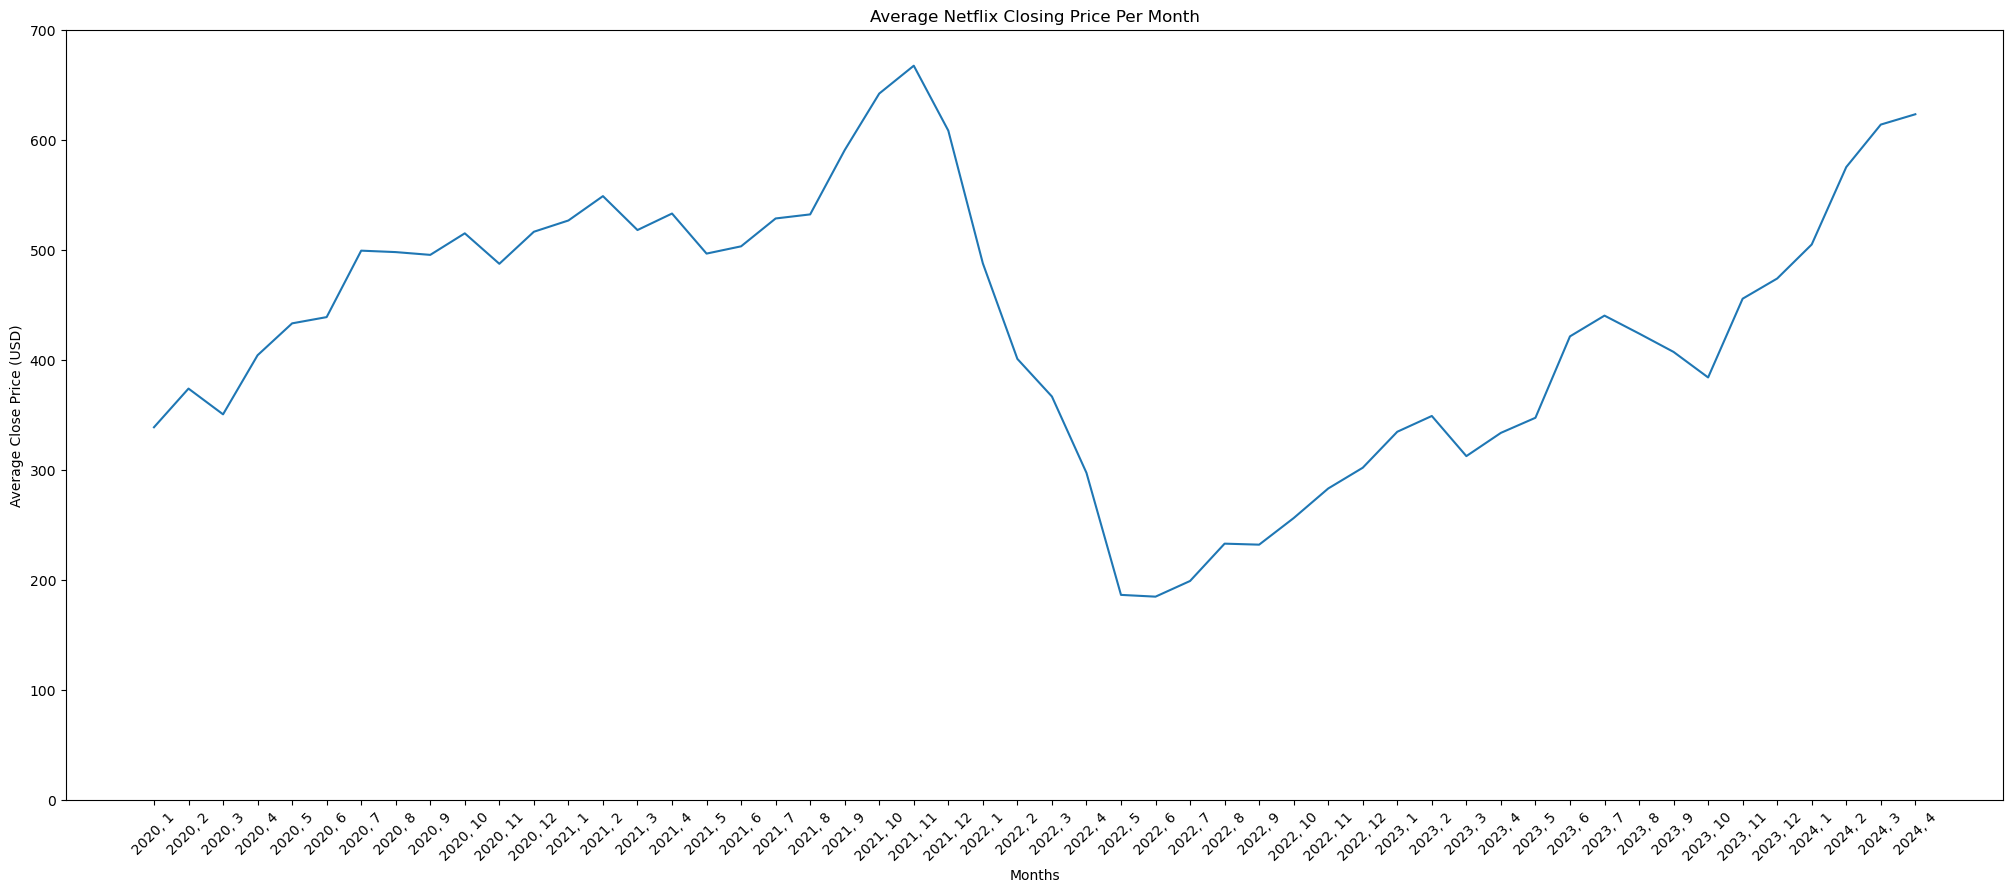

In [31]:
# Creates the plot for Netflix
stock_plot(netflix_new_df, 'Netflix')

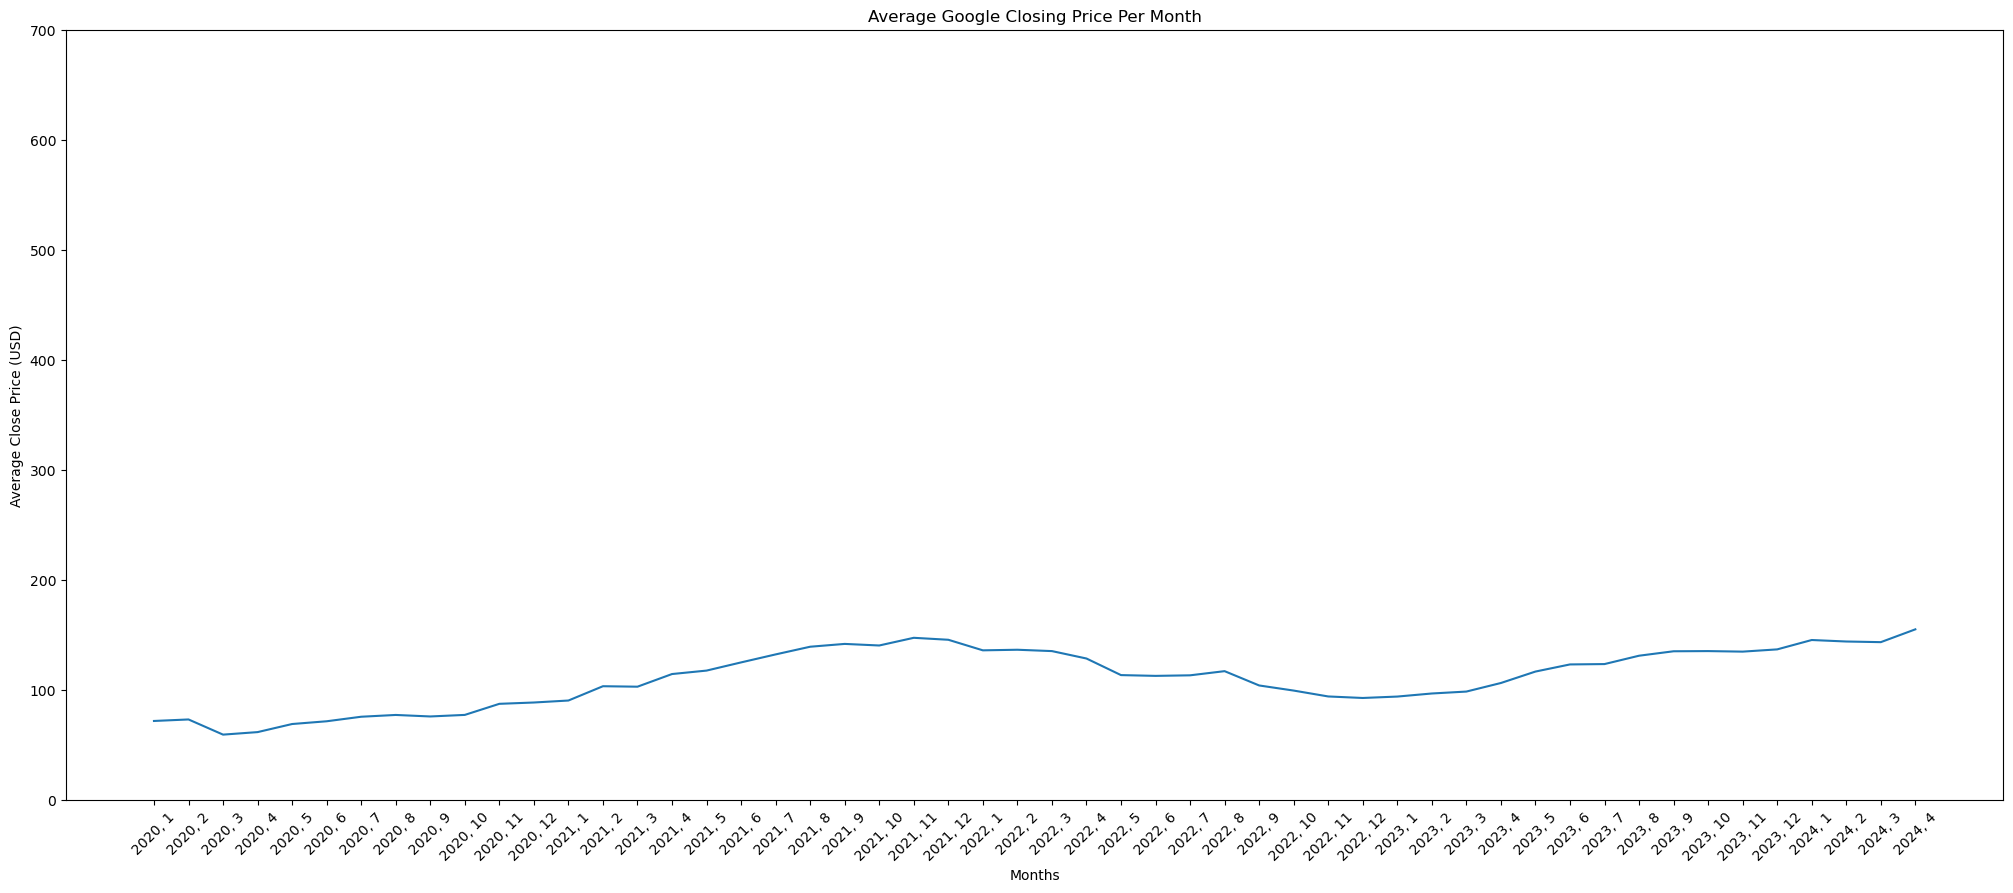

In [32]:
# Creates the plot for Google
stock_plot(google_new_df, 'Google')

# Using the CSV files from Kaggle

In [15]:
# Read the CSV file
google_file_path = './Resources/Google.csv'
google_df = pd.read_csv(google_file_path)

# Add a year column to the dataframe
google_df['Date'] = pd.to_datetime(google_df['Date'])
google_df['Year'] = google_df['Date'].dt.year

# Display the dataframe
google_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659000,2004
1,2004-08-20,50.555557,54.594593,50.300301,54.209209,54.209209,22834300,2004
2,2004-08-23,55.430431,56.796795,54.579578,54.754753,54.754753,18256100,2004
3,2004-08-24,55.675674,55.855854,51.836838,52.487488,52.487488,15247300,2004
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188600,2004


In [16]:
# Read the CSV file
apple_file_path = './Resources/Apple.csv'
apple_df = pd.read_csv(apple_file_path)

# Add a year column to the dataframe
apple_df['Date'] = pd.to_datetime(apple_df['Date'])
apple_df['Year'] = apple_df['Date'].dt.year

# Display the dataframe
apple_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
10011,2020-08-26,126.180000,126.992500,125.082497,126.522499,126.522499,163022400.0,2020
10012,2020-08-27,127.142502,127.485001,123.832497,125.010002,125.010002,155552400.0,2020
10013,2020-08-28,126.012497,126.442497,124.577499,124.807503,124.807503,187630000.0,2020
10014,2020-08-31,127.580002,131.000000,126.000000,129.039993,129.039993,225702700.0,2020
10015,2020-09-01,132.759995,134.800003,130.529999,134.179993,134.179993,151948100.0,2020


In [17]:
# Read the CSV file
amazon_file_path = './Resources/Amazon.csv'
amazon_df = pd.read_csv(amazon_file_path)

# Add a year column to the dataframe
amazon_df['Date'] = pd.to_datetime(amazon_df['Date'])
amazon_df['Year'] = amazon_df['Date'].dt.year

# Display the dataframe
amazon_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1997
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1997
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1997
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1997
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1997


In [18]:
# Read the CSV file
netflix_file_path = './Resources/Netflix.csv'
netflix_df = pd.read_csv(netflix_file_path)

# Add a year column to the dataframe
netflix_df['Date'] = pd.to_datetime(netflix_df['Date'])
netflix_df['Year'] = netflix_df['Date'].dt.year

# Display the dataframe
netflix_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002


In [19]:
# Read the CSV file
facebook_file_path = './Resources/Facebook.csv'
facebook_df = pd.read_csv(facebook_file_path)

# Add a year column to the dataframe
facebook_df['Date'] = pd.to_datetime(facebook_df['Date'])
facebook_df['Year'] = facebook_df['Date'].dt.year

# Display the dataframe
facebook_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
2071,2020-08-12,258.970001,263.899994,258.109985,259.890015,259.890015,21428300,2020
2072,2020-08-13,261.549988,265.160004,259.570007,261.299988,261.299988,17374000,2020
2073,2020-08-14,262.309998,262.649994,258.679993,261.239990,261.239990,14792700,2020
2074,2020-08-17,262.500000,264.100006,259.399994,261.160004,261.160004,13351100,2020
2075,2020-08-18,260.950012,265.149994,259.260010,262.339996,262.339996,18677500,2020


In [20]:
# Create groupby series for the mean closing prices by year
amazon_average_close_by_year = amazon_df.groupby('Year')['Close'].mean()
facebook_average_close_by_year = facebook_df.groupby('Year')['Close'].mean()
apple_average_close_by_year = apple_df.groupby('Year')['Close'].mean()
google_average_close_by_year = google_df.groupby('Year')['Close'].mean()
netflix_average_close_by_year = netflix_df.groupby('Year')['Close'].mean()

# Changes the series into dataframes for easier plotting
amazon_average_close_by_year_df = amazon_average_close_by_year.reset_index() 
facebook_average_close_by_year_df = facebook_average_close_by_year.reset_index()
apple_average_close_by_year_df = apple_average_close_by_year.reset_index()
google_average_close_by_year_df = google_average_close_by_year.reset_index()
netflix_average_close_by_year_df = netflix_average_close_by_year.reset_index()


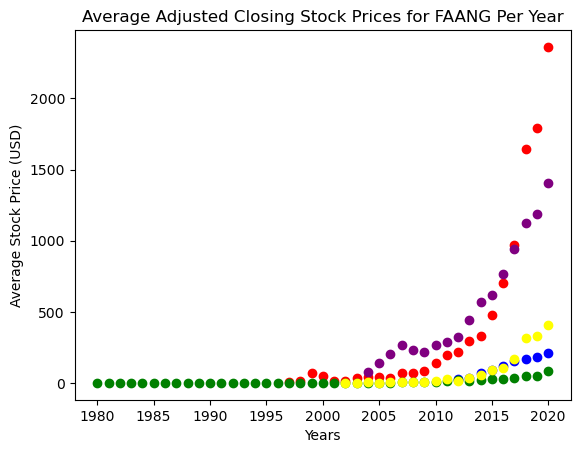

In [21]:
# Create plots for each stock
fig, ax = plt.subplots()
ax.scatter(amazon_average_close_by_year_df['Year'],amazon_average_close_by_year_df['Close'], color='red')
ax.scatter(facebook_average_close_by_year_df['Year'],facebook_average_close_by_year_df['Close'], color='blue')
ax.scatter(apple_average_close_by_year_df['Year'],apple_average_close_by_year_df['Close'], color='green')
ax.scatter(google_average_close_by_year_df['Year'],google_average_close_by_year_df['Close'], color='purple')
ax.scatter(netflix_average_close_by_year_df['Year'],netflix_average_close_by_year_df['Close'], color='yellow')

# Add labels
ax.set_xlabel("Years")
ax.set_ylabel('Average Stock Price (USD)')
ax.set_title('Average Adjusted Closing Stock Prices for FAANG Per Year')

# Display plot
plt.show()